In [1]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("C:\\Users\\tharu\\Documents\\BHI1.csv")
test = pd.read_csv("C:\\Users\\tharu\\Documents\\BHI2.csv")
ss = pd.read_csv("C:\\Users\\tharu\\Documents\\BHI3.csv")


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
ss.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
ss.shape

(418, 2)

In [7]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<Axes: >

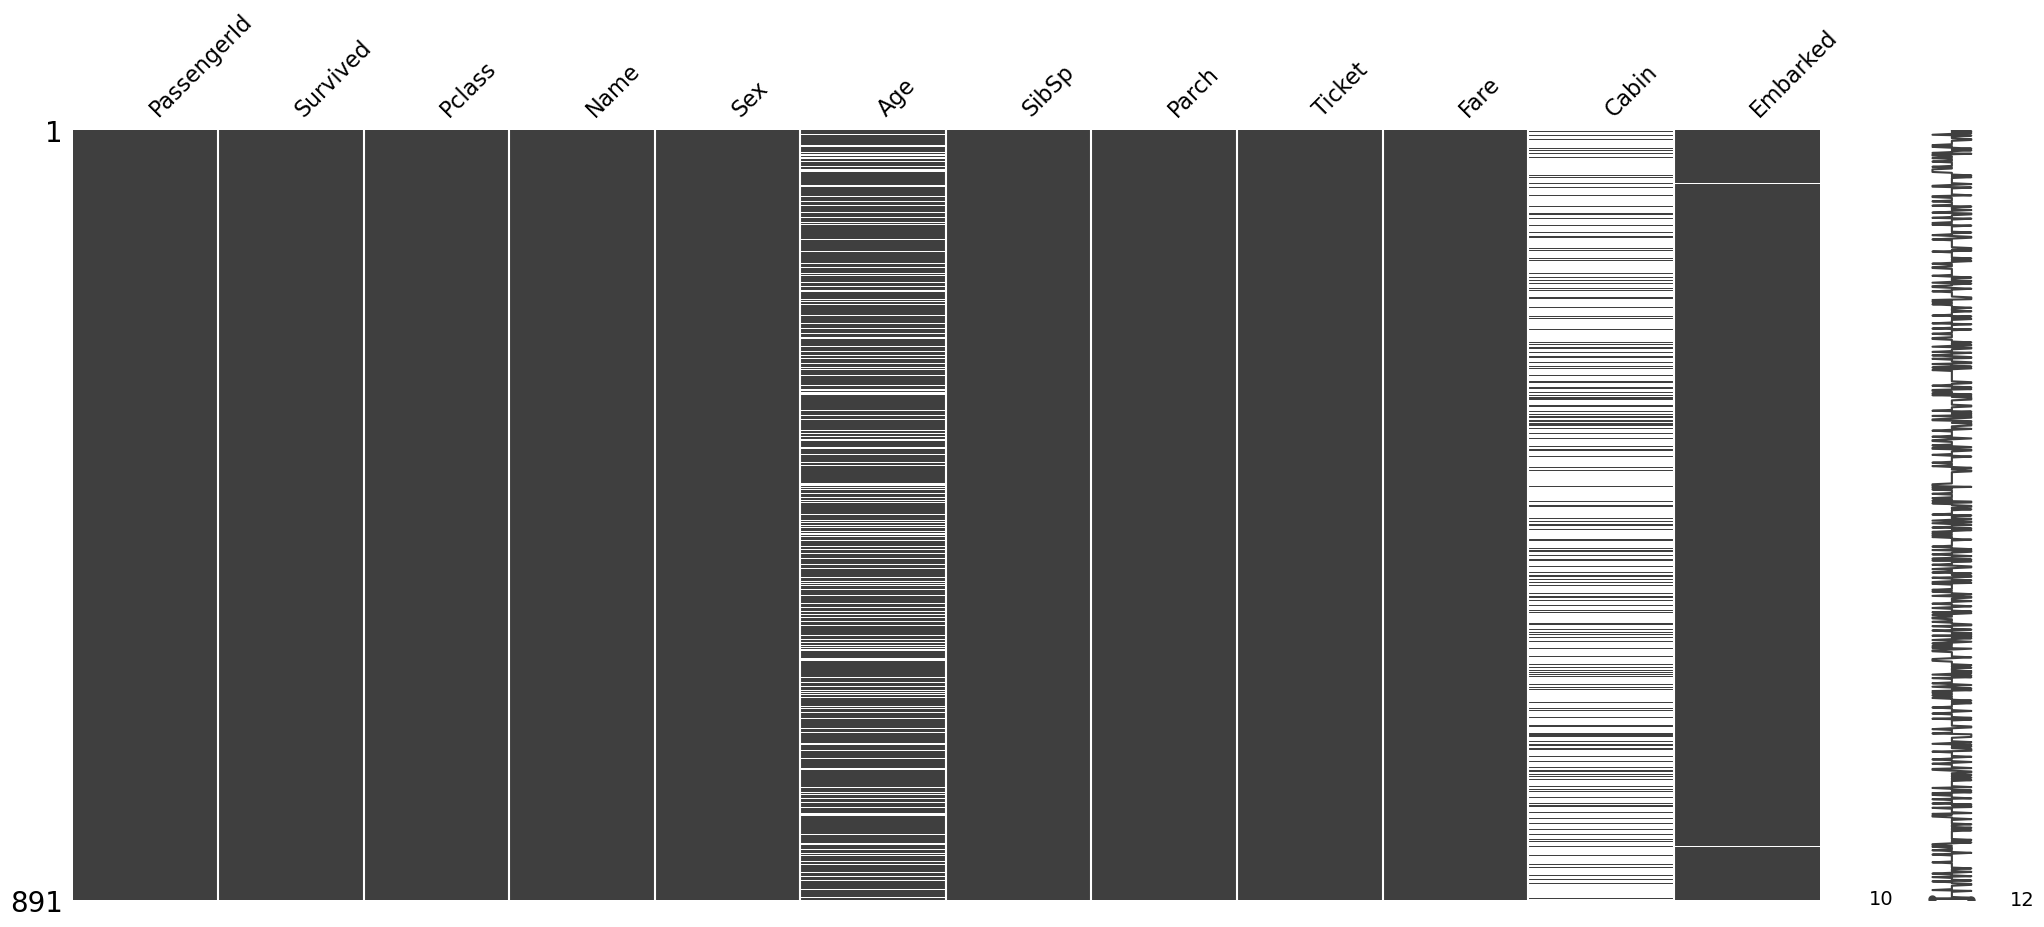

In [10]:
missingno.matrix(train)

<Axes: >

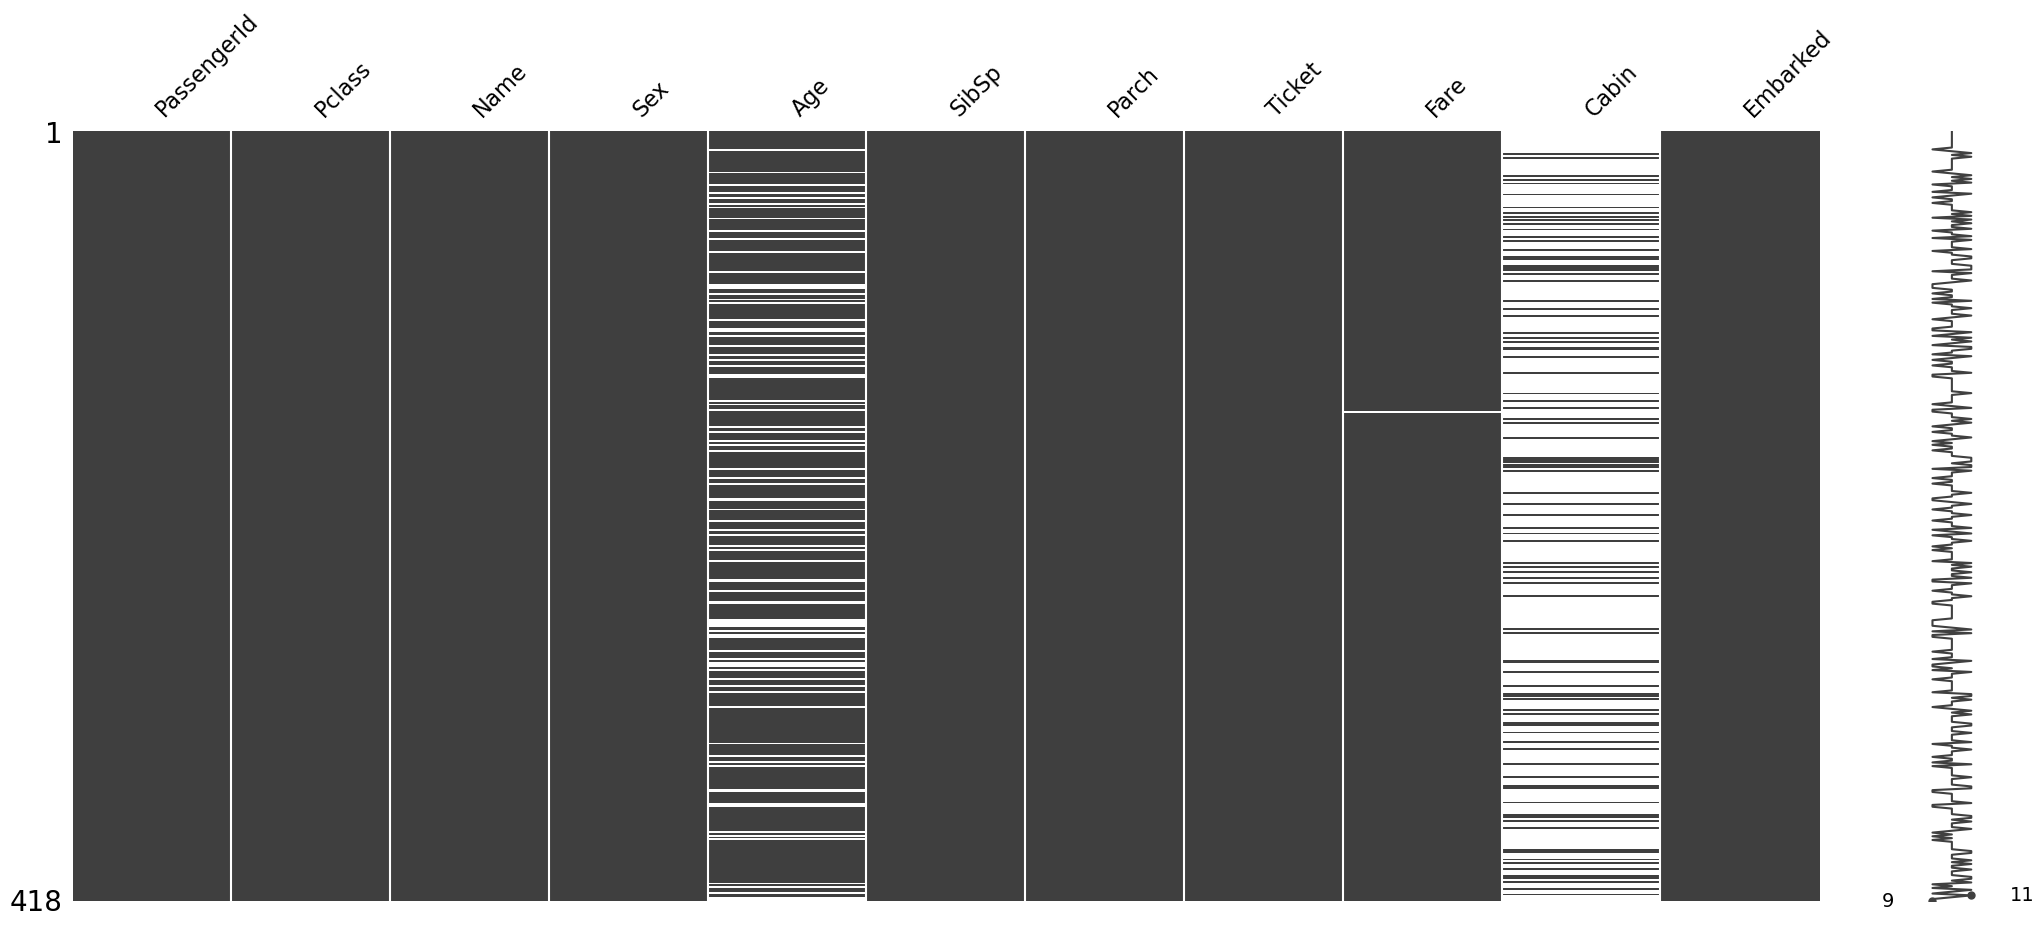

In [11]:
missingno.matrix(test)


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

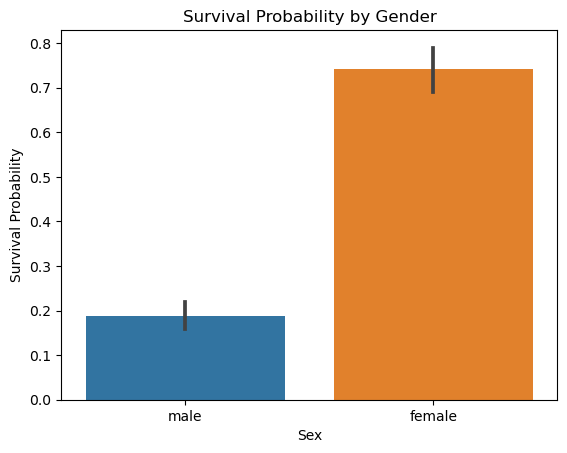

In [16]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

In [17]:
train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

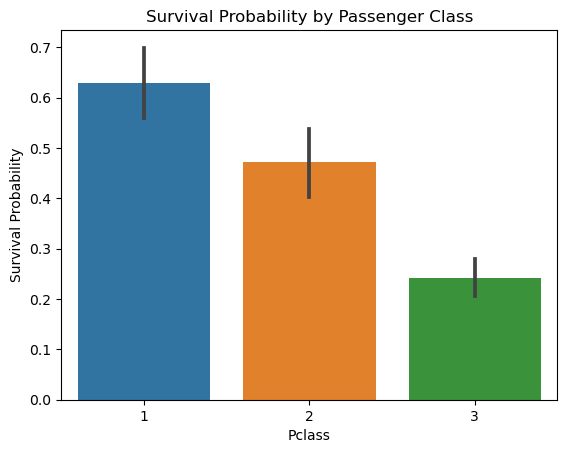

In [20]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

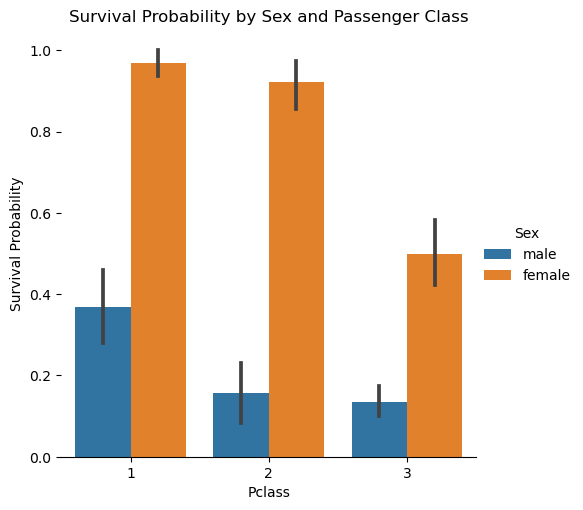

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar')
g.despine(left=True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')


In [23]:
train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

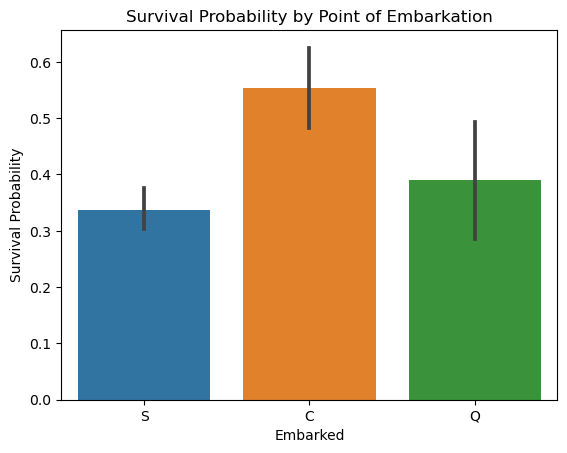

In [25]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

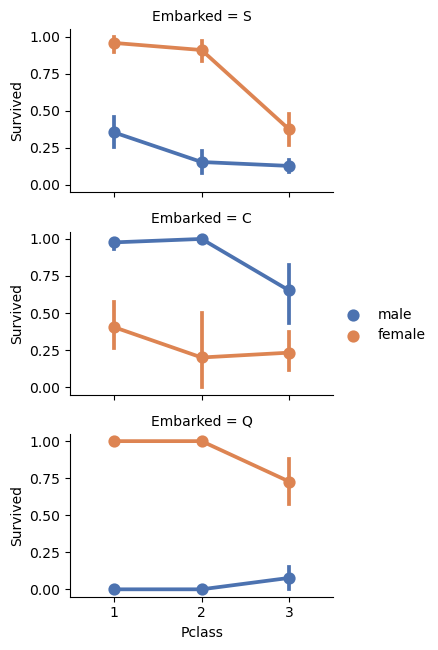

In [29]:
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()


In [31]:
def detect_outliers(df, n, features):

    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [32]:
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [33]:
print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


<Axes: >

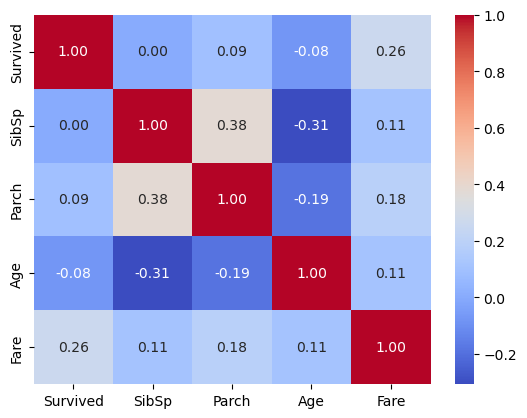

In [34]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [35]:
train['SibSp'].value_counts(dropna = False)


0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [36]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

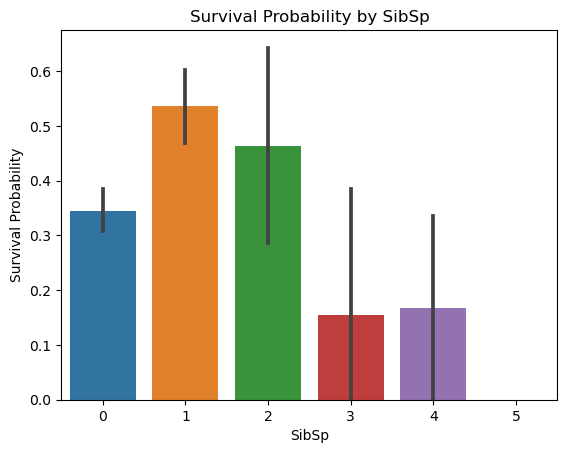

In [37]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [38]:
train['Parch'].value_counts(dropna = False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Parch')

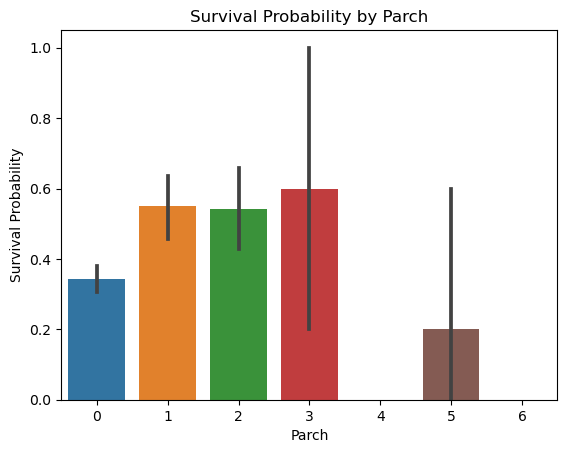

In [39]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

In [40]:
train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

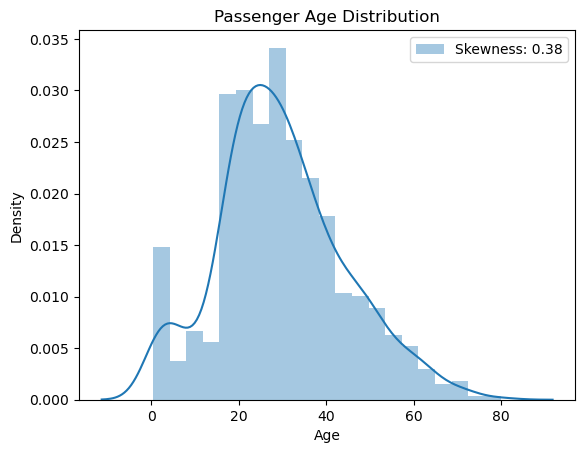

In [41]:

sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

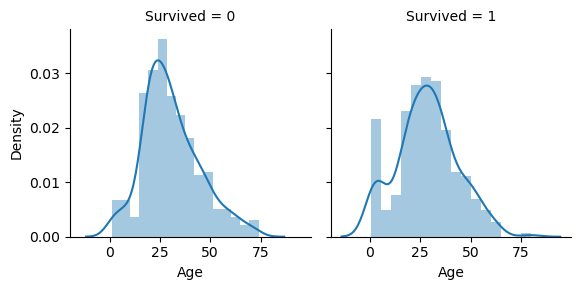

In [42]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

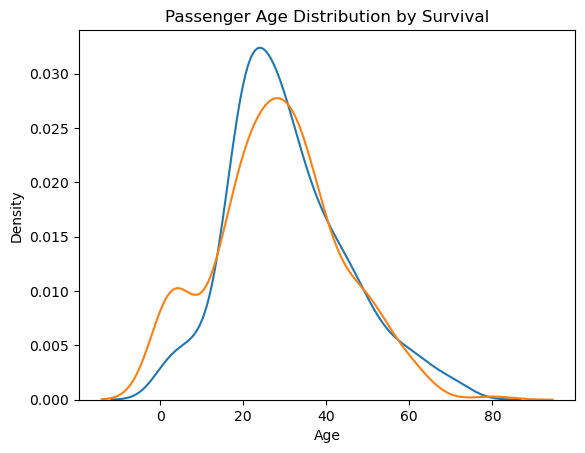

In [43]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

In [44]:
train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

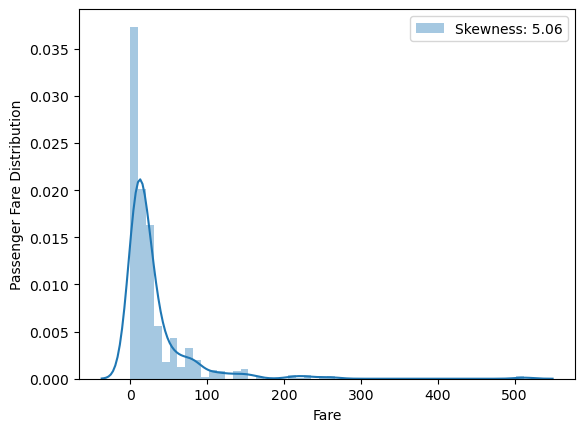

In [45]:
sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

In [47]:

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [48]:
train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [49]:
mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [50]:

train['Embarked'].fillna(mode, inplace = True)

In [51]:
test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [52]:
median = test['Fare'].dropna().median()
median

14.4542

In [53]:
test['Fare'].fillna(median, inplace = True)

In [54]:
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [55]:
combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [56]:
combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

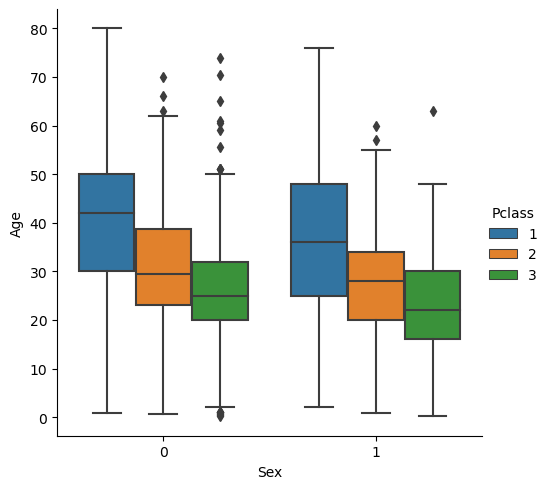

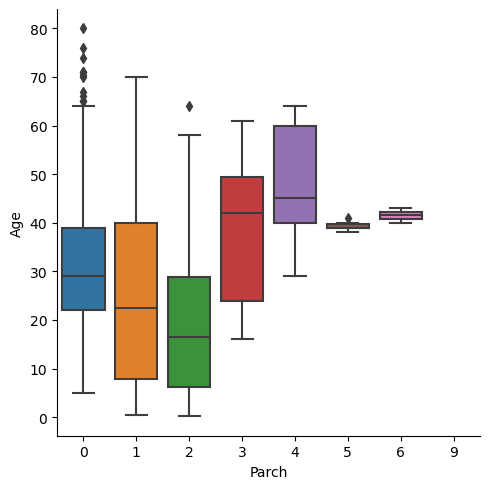

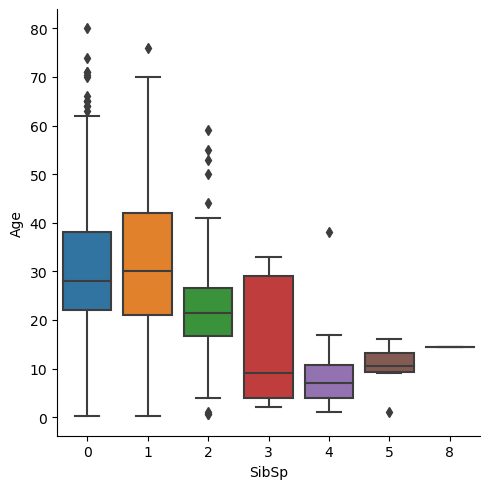

In [58]:
import seaborn as sns

# Assuming you have imported the necessary libraries and 'combine' DataFrame

sns.catplot(y='Age', x='Sex', hue='Pclass', kind='box', data=combine)
sns.catplot(y='Age', x='Parch', kind='box', data=combine)
sns.catplot(y='Age', x='SibSp', kind='box', data=combine)


<Axes: >

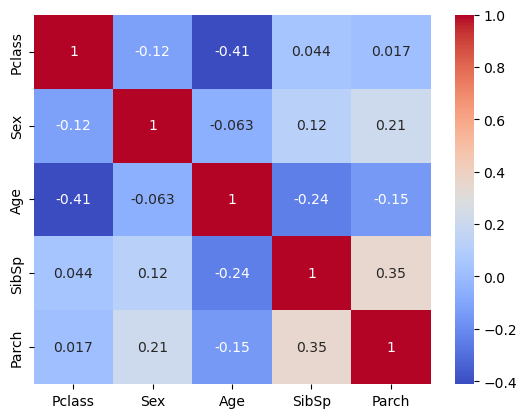

In [59]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

In [60]:
age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)


256

In [61]:
for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [62]:
combine['Age'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger Fare Distribution')

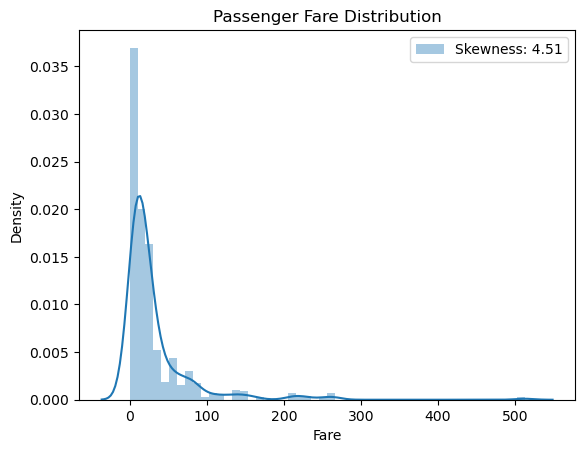

In [63]:
sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [64]:
combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

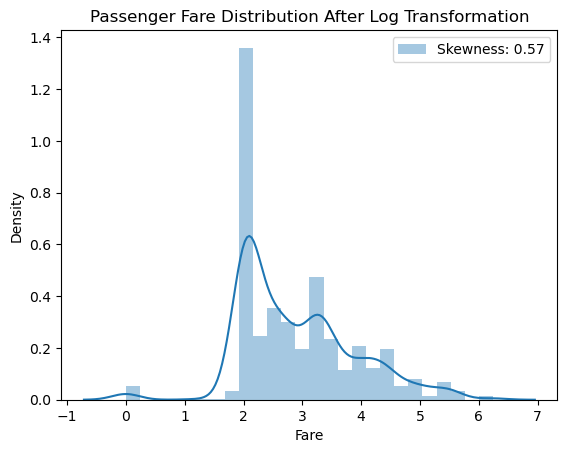

In [65]:
sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

In [66]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [67]:
combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [68]:
combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [69]:
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [70]:
combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [71]:
combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [72]:
combine = combine.drop('AgeBand', axis = 1)

In [73]:
combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [74]:
combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [75]:
combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [76]:

combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Age*Class
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,1.981001,S,Mr,2,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,4.266662,C,Mrs,2,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,1,0,0,2.070022,S,Miss,1,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,3.972177,S,Mrs,2,2
4,5,0.0,3,"Allen, Mr. William Henry",0,2,0,0,2.085672,S,Mr,1,6


In [77]:
combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Em_C,Em_Q,Em_S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,1.981001,2,...,0,1,0,0,0,0,0,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,4.266662,2,...,0,0,1,0,0,0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,1,0,0,2.070022,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,3.972177,2,...,0,0,1,0,0,0,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,2,0,0,2.085672,1,...,0,1,0,0,0,0,0,0,0,1


In [78]:
combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [79]:
combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [80]:
combine['Fare'] = combine['Fare'].astype('int')

In [81]:
combine = combine.drop('FareBand', axis = 1)

In [83]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Em_C,Em_Q,Em_S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,1,2,...,0,1,0,0,0,0,0,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,2,2,...,0,0,1,0,0,0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,2,2,...,0,0,1,0,0,0,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,2,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1


In [84]:
train = combine[:len(train)]
test = combine[len(train):]

In [85]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Em_C,Em_Q,Em_S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,1,2,...,0,1,0,0,0,0,0,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,2,2,...,0,0,1,0,0,0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,2,2,...,0,0,1,0,0,0,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,2,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1


In [86]:
train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,Age*Class,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Em_C,Em_Q,Em_S
0,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,1,2,3,...,0,1,0,0,0,0,0,0,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,2,2,2,...,0,0,1,0,0,0,0,1,0,0
2,1.0,3,"Heikkinen, Miss. Laina",1,1,0,0,1,1,3,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,2,2,2,...,0,0,1,0,0,0,0,0,0,1
4,0.0,3,"Allen, Mr. William Henry",0,2,0,0,1,1,6,...,0,1,0,0,0,0,0,0,0,1


In [87]:
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,Age*Class,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Em_C,Em_Q,Em_S
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,1,2,3,...,0,1,0,0,0,0,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,2,2,2,...,0,0,1,0,0,0,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1,1,3,...,0,0,0,0,0,0,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,2,2,2,...,0,0,1,0,0,0,0,0,0,1
4,0,3,"Allen, Mr. William Henry",0,2,0,0,1,1,6,...,0,1,0,0,0,0,0,0,0,1


In [88]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Em_C,Em_Q,Em_S
881,892,NaN,3,"Kelly, Mr. James",0,2,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
882,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,1,2,...,0,0,1,0,0,0,0,0,0,1
883,894,NaN,2,"Myles, Mr. Thomas Francis",0,3,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
884,895,NaN,3,"Wirz, Mr. Albert",0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
885,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,1,3,...,0,0,1,0,0,0,0,0,0,1


In [89]:

test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,Age*Class,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Em_C,Em_Q,Em_S
881,892,3,"Kelly, Mr. James",0,2,0,0,1,1,6,...,0,1,0,0,0,0,0,0,1,0
882,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,1,2,6,...,0,0,1,0,0,0,0,0,0,1
883,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,1,1,6,...,0,1,0,0,0,0,0,0,1,0
884,895,3,"Wirz, Mr. Albert",0,1,0,0,1,1,3,...,0,1,0,0,0,0,0,0,0,1
885,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,1,3,3,...,0,0,1,0,0,0,0,0,0,1
